In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3259,2024-12-16,198.160004,200.639999,194.110001,194.365005,32248600
3260,2024-12-17,197.119995,202.880005,196.690002,198.529999,24129500
3261,2024-12-18,190.149994,198.690002,189.279999,196.830002,27638400


In [5]:
ma_100_days = data.Close.rolling(100).mean()  #this is the moving average of 100 days 

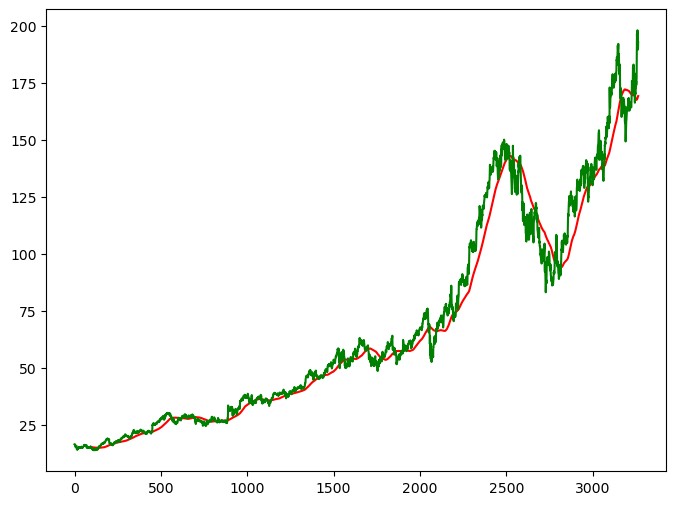

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean() #this is the moving average of 200 days 

<function matplotlib.pyplot.show(close=None, block=None)>

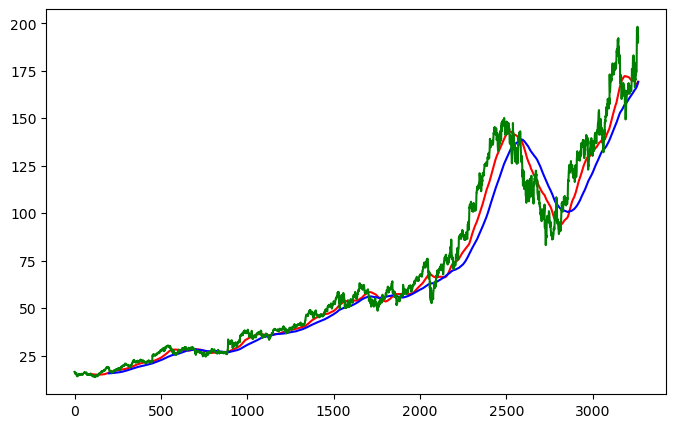

In [8]:
plt.figure(figsize=(8,5))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show

In [9]:
ma_300_days=data.Close.rolling(300).mean()

[]

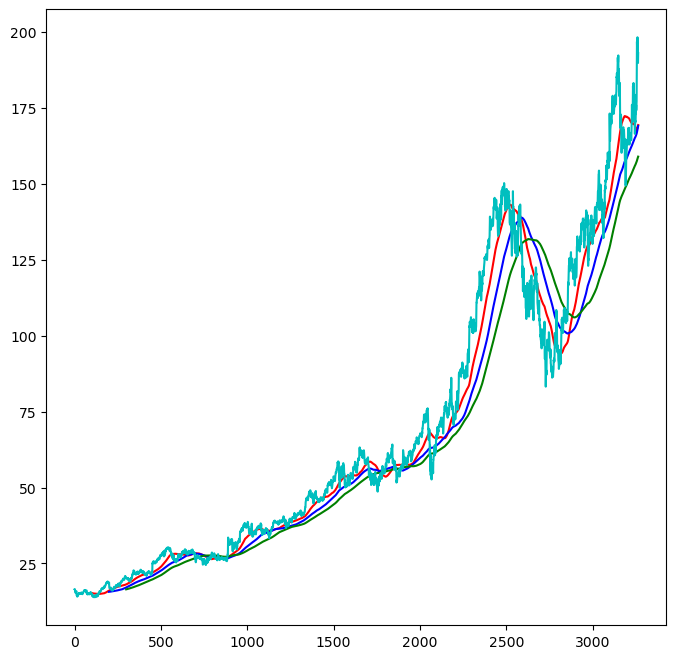

In [10]:
plt.figure(figsize=(8,8))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(ma_300_days,'g')
plt.plot(data.Close,'c')
plt.plot()

In [11]:
data.isnull().sum()

Price   Ticker
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,3264.000000,3264.000000,3264.000000,3264.000000,3.264000e+03
mean,68.317544,68.998525,67.613154,68.280711,4.202064e+07
std,46.378345,46.885947,45.878740,46.350627,3.438950e+07
min,13.874207,14.009959,13.811419,13.906222,1.584340e+05
25%,28.754869,28.979462,28.537581,28.817053,2.278080e+07
50%,53.881151,54.493451,53.272341,53.894601,3.054945e+07
75%,104.386059,105.466179,102.907746,103.643473,4.828700e+07
max,198.160004,202.880005,196.690002,198.529999,4.995615e+08


In [14]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [15]:
data_train.shape[0]

2611

In [16]:
data_test.shape[0]

653

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [18]:
data_train_scale = scaler.fit_transform (data_train)

In [19]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
from keras.layers import  Dense,Dropout,LSTM
from keras.models import Sequential

In [23]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

_s
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(x,y, epochs=50,batch_size=32,verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step - loss: 0.0554
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - loss: 0.0058
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - loss: 0.0052
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - loss: 0.0043
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - loss: 0.0047
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - loss: 0.0046
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - loss: 0.0034
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 239ms/step - loss: 0.0028
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 308ms/step - loss: 0.0038
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 206ms/step - loss: 0.0026
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - loss: 0.0032
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 219ms/step - loss: 0.0034
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - loss: 0.0030
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 244ms/step - loss: 0.0026
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [31]:
pas_100_days = data_train.tail(100)

In [32]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [33]:
data_test_scale  =  scaler.fit_transform(data_test)

In [34]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [35]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step


In [36]:
scale =1/scaler.scale_

In [37]:
y_predict = y_predict*scale

In [38]:
y = y*scale

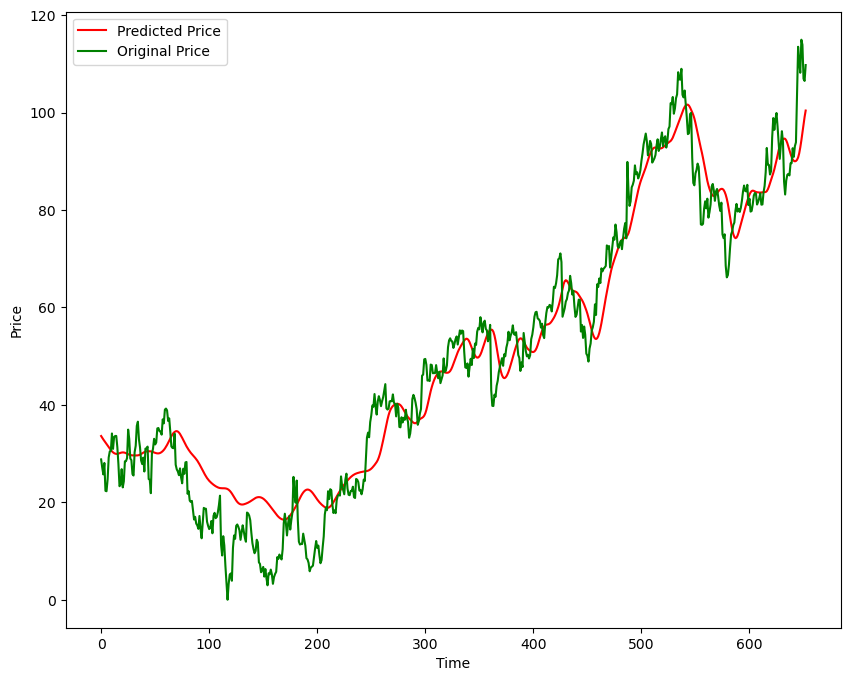

In [39]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
model.save('Stock Predictions Model.keras')